

## Assignment 2: Data, Grammar and Engineering

**AMS MADE YMS31303**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>

---



## Question 1

We will work with data from the Guardian's version of [Wikileaks' Afghanistan war logs](http://www.theguardian.com/news/datablog/2010/jul/27/wikileaks-afghanistan-data-datajournalism). The table is stored on a GoogleDoc on the following address:

> [https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1](https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1)

Write a Python code snippet using IPython.display to embed this Google Sheet directly into a Jupyter notebook for easy reference and interaction.

In [22]:
from IPython.display import IFrame

# The original URL of the Google Sheet
sheet_url = "https://docs.google.com/spreadsheets/d/1EAx8_ksSCmoWW_SlhFyq2QrRn0FNNhcg1TtDFJzZRgc/edit?hl=en#gid=1"

#Modify the URL to be in "embed" mode
embed_url = sheet_url.replace("/edit?hl=en#", "/preview?")

# To embed the Google Sheet in an IFrame
IFrame(embed_url, width=1000, height=500)


## Question 2
a) Save the csv file to your compluter and Load the data in Tab "TOTAL Casualties".

b) Display the first 5 rows of the dataset using .head().

c) Extract the column names and create a dictionary where each column name is the key, and the first value in that column is the value.

In [23]:
import pandas as pd

f = "Wikilog.csv"

db = pd.read_csv(f, skipfooter=1, engine="python", index_col=['Year','Month']) #import data from cvs file into python
db.head() #creates the first 5 rows of the cvs file

Taliban  Civilians  Afghan forces  \
Year Month                                         
2004 January      15.0         51           23.0   
     February      NaN          7            4.0   
     March        19.0          2            NaN   
     April         5.0          3           19.0   
     May          18.0         29           56.0   

               Nato (detailed in spreadsheet)  Nato - official figures  
Year Month                                                              
2004 January                              NaN                       11  
     February                             5.0                        2  
     March                                2.0                        3  
     April                                NaN                        3  
     May                                  6.0                        9

In [24]:
import pandas as pd
column_dict = {col: db[col].iloc[0] for col in db.columns} #creating new dict
#For each column col, df[col].iloc[0] retrieves the first value in that column.

#output
print(column_dict)

{'Taliban': np.float64(15.0), 'Civilians': np.int64(51), 'Afghan forces': np.float64(23.0), 'Nato (detailed in spreadsheet)': np.float64(nan), 'Nato - official figures': np.int64(11)}


## Question 3
a) Plot a histogram of any numeric column from the dataset.

b) Use a kernel density plot (KDE) to visualize the distribution of another numeric column.

c) Create a bar chart of a categorical variable and discuss how the plot changes if you switch to a horizontal bar plot.

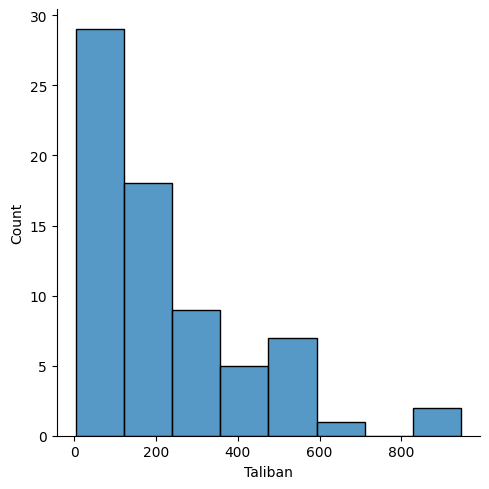

In [25]:
import seaborn as sns
import pandas as pd

f = "Wikilog.csv"
_ = sns.displot(db['Taliban'], kde=False)

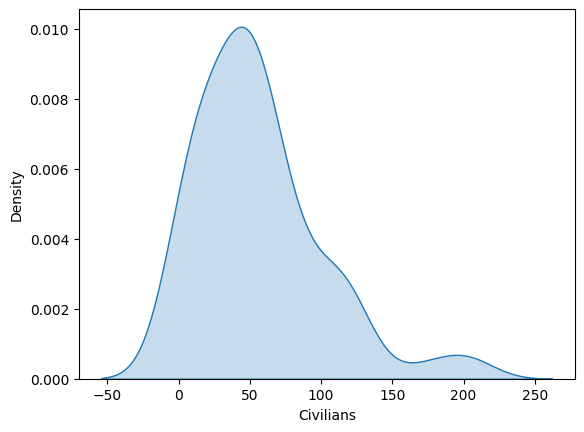

In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

f = "Wikilog.csv"
_ = sns.kdeplot(db['Civilians'], fill=True)


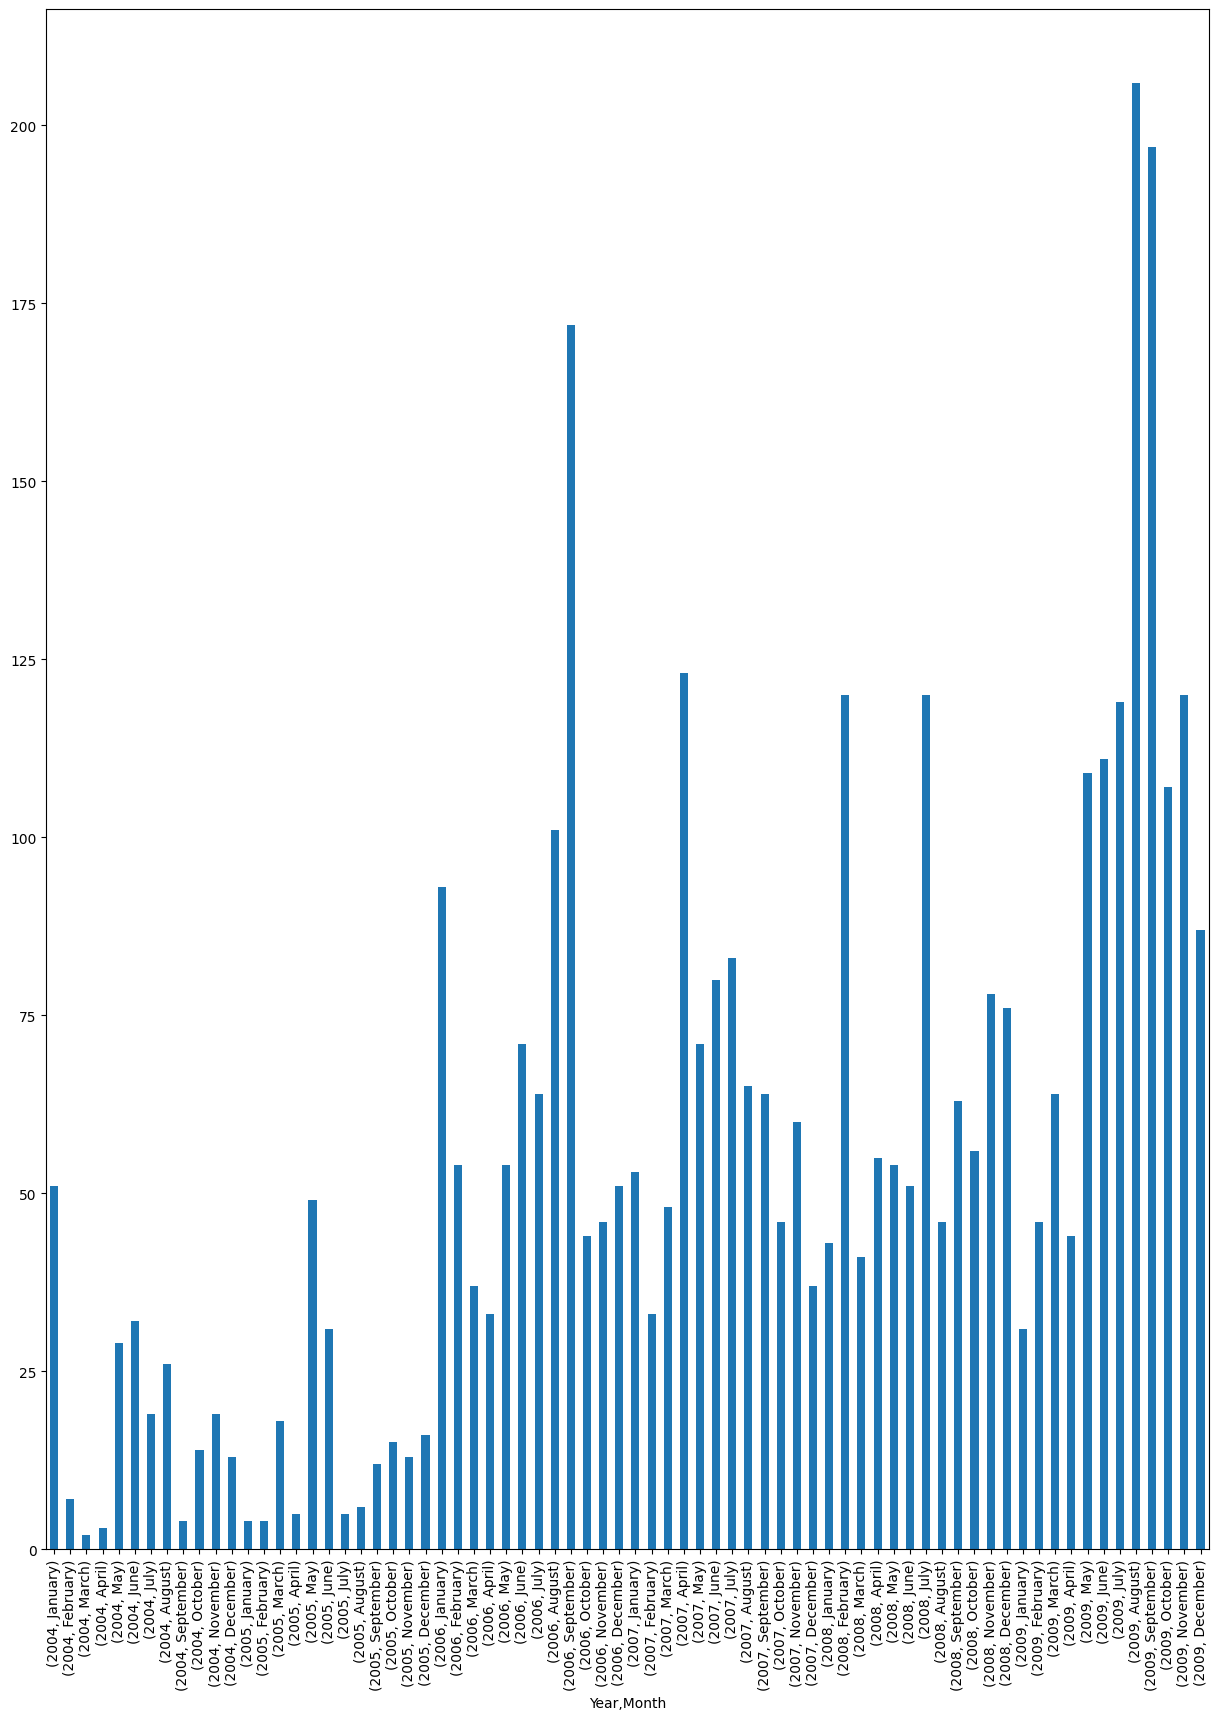

In [27]:
_ = db['Civilians'].plot(kind='bar', figsize=(15, 20)) #leave ascending function out beacuse data is already sorted

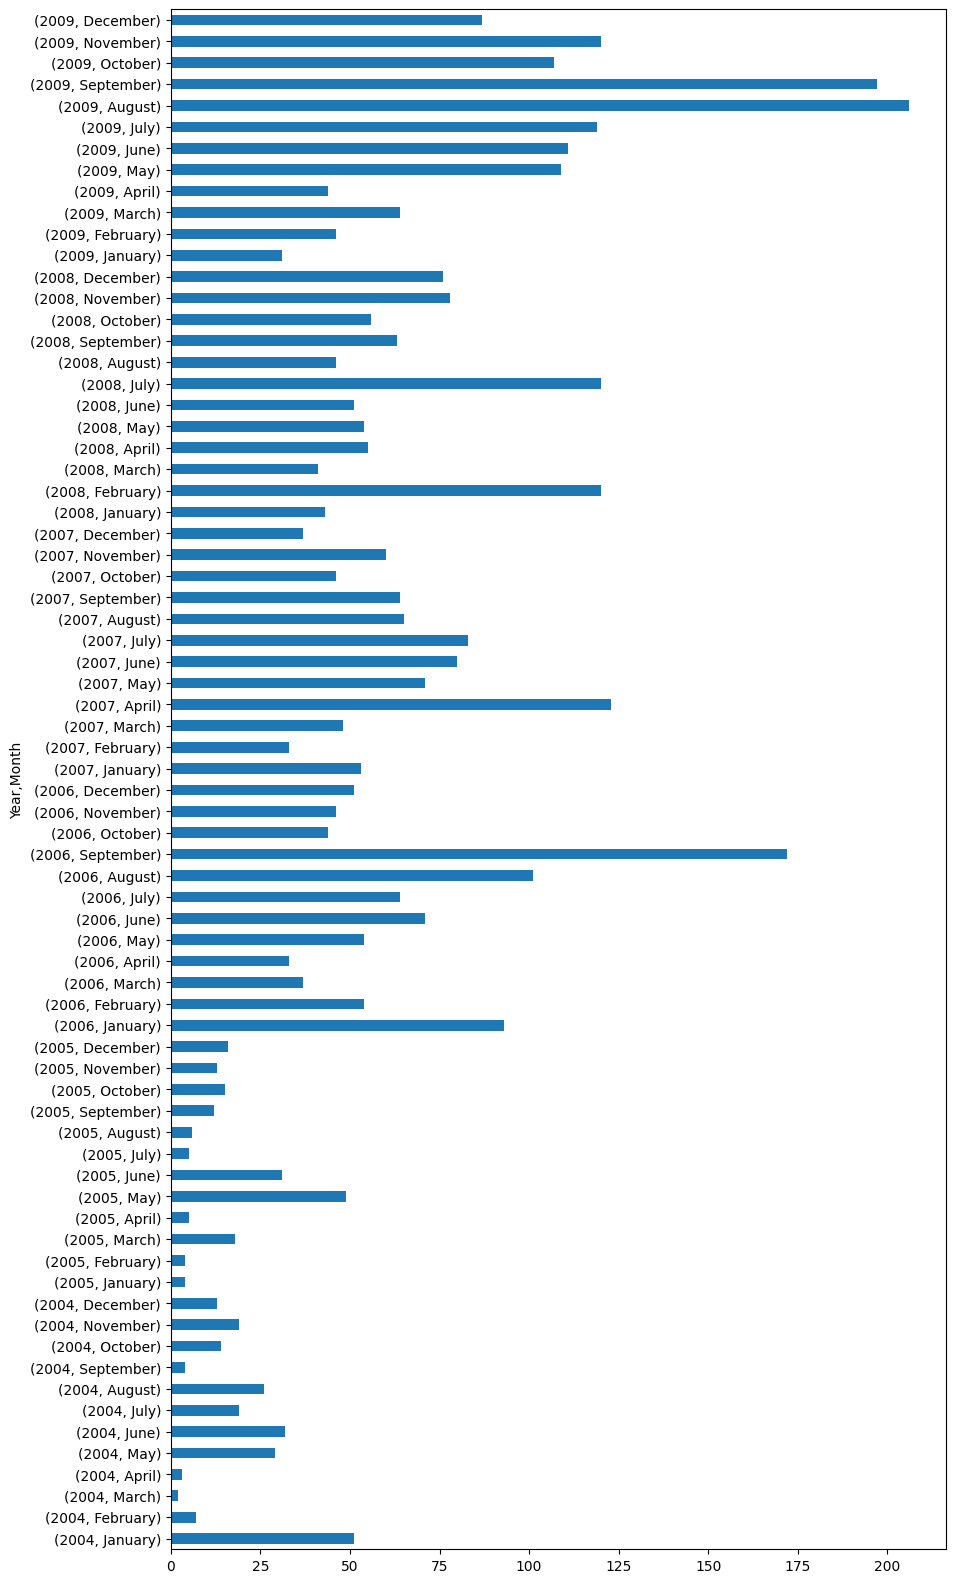

In [28]:
_ = db['Civilians'].plot(kind='barh', figsize=(10, 20)) #leave ascending function out beacuse data is already sorted

## Question 4
a) Write a loop that iterates through each row of a DataFrame and prints the value of one specific column.

b) Modify the loop so that it extracts rows where a numeric column value is greater than a threshold and stores these rows in a new DataFrame.

In [29]:
import pandas as pd
db_4 = pd.DataFrame({'c1': [10, 11, 12, 13, 14, 15], 'c2': [100, 110, 120, 130, 140, 150]}) #creating a new variable db_4 with a custom DataFrame

for index, row in db_4.iterrows():
     print(row['c1'])

10
11
12
13
14
15


In [30]:
#creating own datagrame
data = {'c1': [10, 11, 12, 13, 14, 15], 'c2': [100, 110, 120, 130, 140, 150]
    
}
db_4 = pd.DataFrame(data)

# Define a threshold for the numeric column 
threshold = 13

# Create an empty list to store the rows that meet the condition
filtered_rows = []

# Loop through each row, check if 'c1' is greater than the threshold, and store the rows
for index, row in db_4.iterrows():
    if row['c1'] > threshold:
        filtered_rows.append(row)

# Convert the list of rows into a new DataFrame
filtered_db_4 = pd.DataFrame(filtered_rows)

# Print the new DataFrame
print(filtered_db_4['c1'])

4    14
5    15
Name: c1, dtype: int64


## Question 5
a) Crate a list containing the names "Civilians" and "Afghan forces"

b) From the imported data keep the the values from these two columns only. Keep in mind that "Year" and "Month" identify each column and sould remain in the dataset.

c) Obtain a monthly total count of casualties for these two groups and create a line and a bar plot of them.


In [31]:
list_of_headers = list(db)
new_list = [list_of_headers[3], list_of_headers[4]]
print(new_list)

['Nato (detailed in spreadsheet)', 'Nato - official figures']


In [32]:
db_5 = db.drop(columns=["Taliban", "Nato (detailed in spreadsheet)", "Nato - official figures"])

#output
print(db_5)

                Civilians  Afghan forces
Year Month                              
2004 January           51           23.0
     February           7            4.0
     March              2            NaN
     April              3           19.0
     May               29           56.0
...                   ...            ...
2009 August           206          190.0
     September        197          133.0
     October          107           86.0
     November         120           69.0
     December          87           65.0

[72 rows x 2 columns]


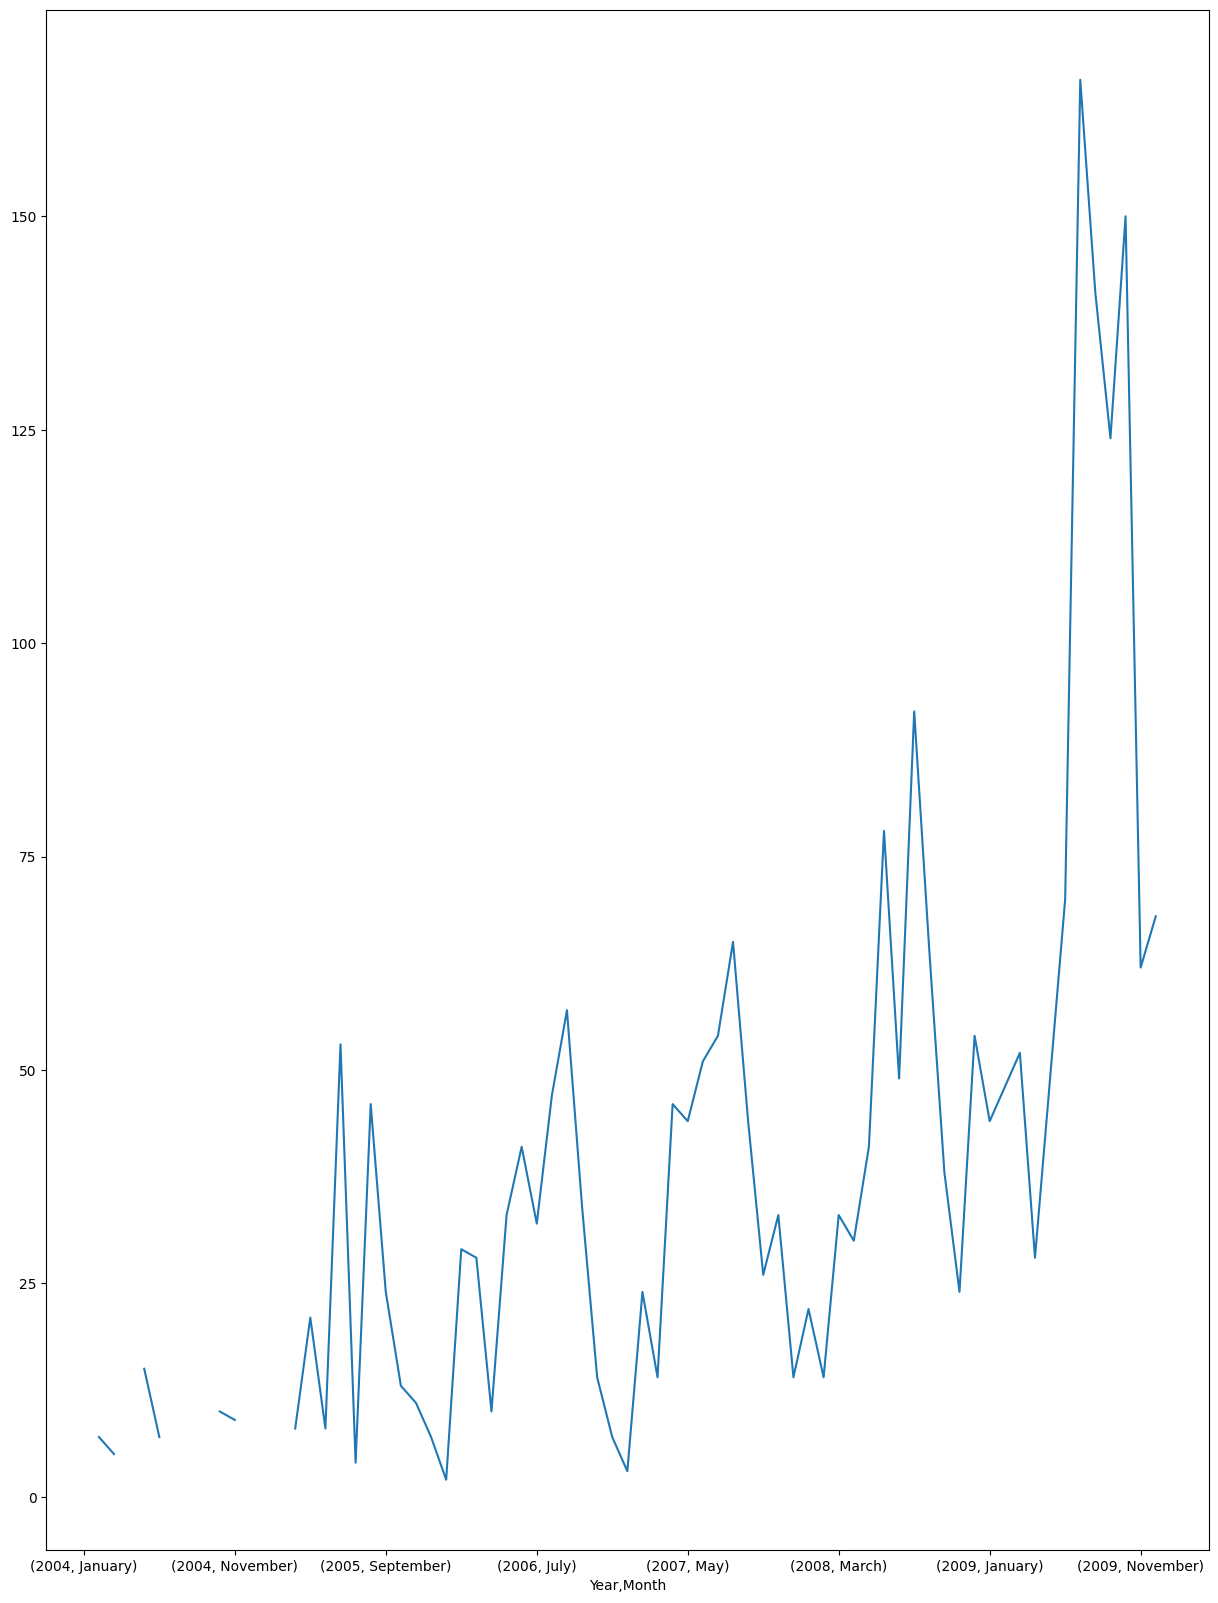

In [33]:
db_5["monthly_d"] = db[new_list[0]] + db[new_list[1]]
_ = db_5['monthly_d'].plot(figsize=(15, 20))

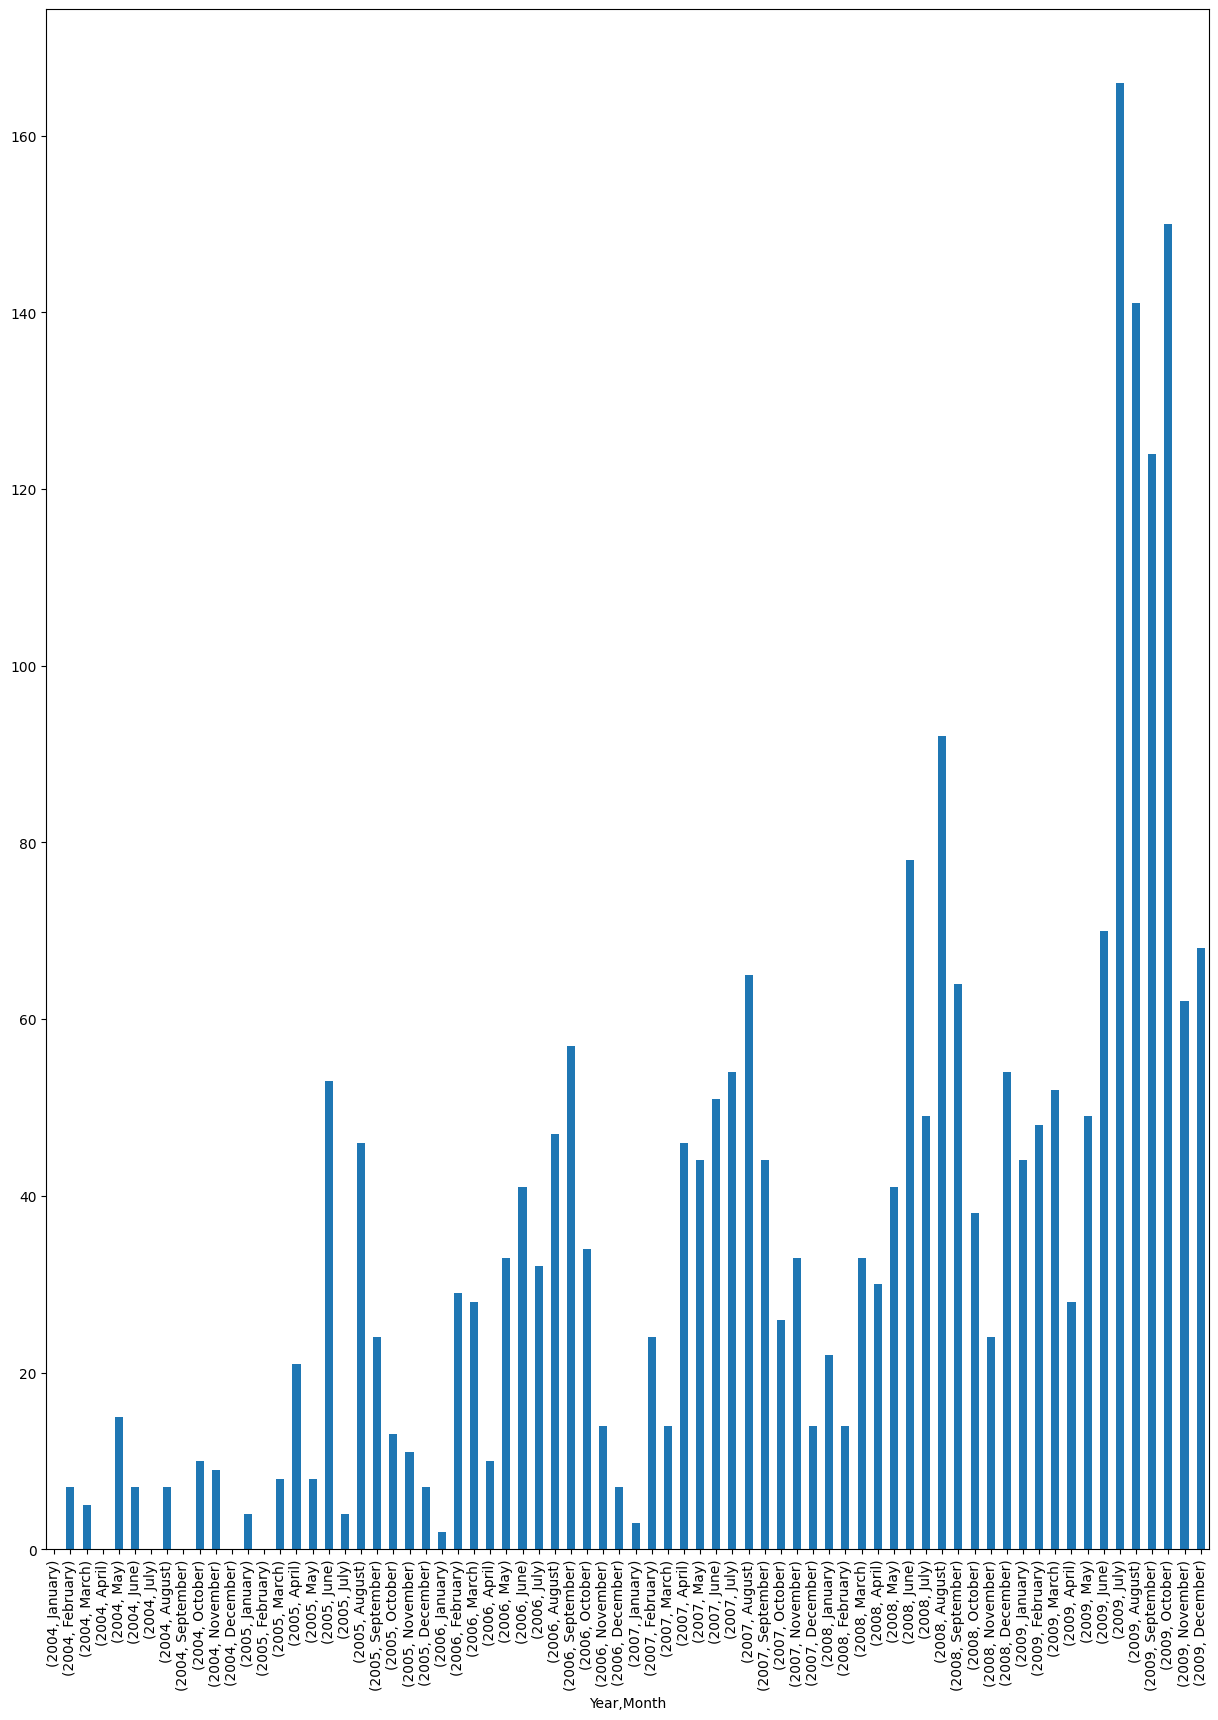

In [34]:
_ = db_5['monthly_d'].plot(kind='bar', figsize=(15, 20))